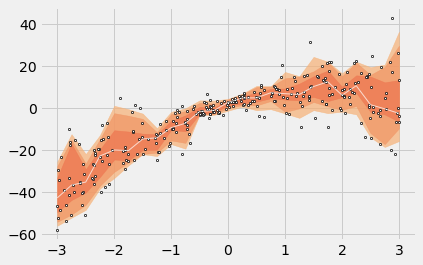

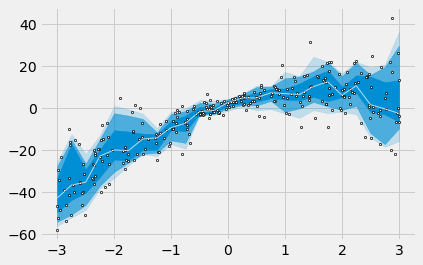

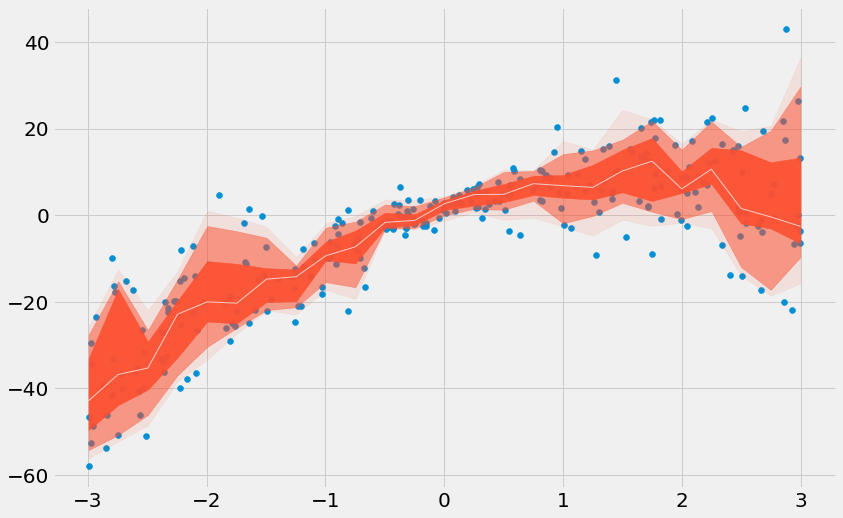

In [1]:
'''
Watercolor regression
Python
Tom Logan
2017/10/03
'''

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd 
from math import *
def main():
    '''
    randomly generates points
    plots a scatter
    fits a watercolor line with the 1-2-3 standard deviations shown
    '''

    # generate random variables
    x,y = generate_random()

    # bin the values and determine the envelopes
    df = bin_by(x, y, nbins=25, bins = None)

    ###
    # Plot 1
    ###
    # determine the colors
    cols = ['#EE7550', '#F19463', '#F6B176']

    with plt.style.context('fivethirtyeight'): 
        # plot the 3rd stdv
        plt.fill_between(df.x, df['5th'], df['95th'], alpha=0.7,color = cols[2])
        plt.fill_between(df.x, df['10th'], df['90th'], alpha=0.7,color = cols[1])
        plt.fill_between(df.x, df['25th'], df['75th'], alpha=0.7,color = cols[0])
        # plt the line
        plt.plot(df.x, df['median'], color = '1', alpha = 0.7, linewidth = 1)
        # plot the points
        plt.scatter(x, y, facecolors='white', edgecolors='0', s = 5, lw = 0.7)

    plt.savefig('fig1.png', facecolor='white', edgecolor='none')
    plt.show()

    ###
    # Plot 2 - same color, dif transparencies
    ###
    # determine the color
    col = list(plt.style.library['fivethirtyeight']['axes.prop_cycle'])[0]['color']

    with plt.style.context('fivethirtyeight'): 
        # plot the 1st band
        plt.fill_between(df.x, df['5th'], df['95th'], alpha=0.2,color = col)
        # plot the 2nd band
        plt.fill_between(df.x, df['10th'], df['90th'], alpha=0.6,color = col)
        plt.fill_between(df.x, df['25th'], df['75th'], alpha=1,color = col)
        # plt the line
        plt.plot(df.x, df['median'], color = '1', alpha = 0.7, linewidth = 1)
        # plot the points
        plt.scatter(x, y, facecolors='white', edgecolors='0', s = 5, lw = 0.7)

    plt.savefig('fig2.png', facecolor='white', edgecolor='none')
    plt.show()

    ###
    # Plot 3 - same color, dif transparencies
    ###
    # determine the color
    col1 = list(plt.style.library['fivethirtyeight']['axes.prop_cycle'])[0]['color']
    col2 = list(plt.style.library['fivethirtyeight']['axes.prop_cycle'])[1]['color']
    fig_width = 30#15.24#6.5 # if columns==1 else 6.9 # width in cm
    font_size = 20
    #
    golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
    fig_height = fig_width*golden_mean # height in cm,
    params = {
            'axes.labelsize': font_size, # fontsize for x and y labels (was 10)
            'font.size': font_size, # was 10
            'legend.fontsize': font_size, # was 10
            'xtick.labelsize': font_size,
            # 'ytick.labelsize': 0,
            'lines.linewidth' : 2,
            'figure.autolayout' : True,
            'figure.figsize': [fig_width/2.54,fig_height/2.54]
            }
        
    with plt.style.context('fivethirtyeight'): 
        mpl.rcParams.update(params)
        # plot the points
        plt.scatter(x, y, facecolors=col1)
        # plot the 1st band
        plt.fill_between(df.x, df['5th'], df['95th'], alpha=0.1,color = col2)
        # plot the 2nd band
        plt.fill_between(df.x, df['10th'], df['90th'], alpha=0.5,color = col2)
        plt.fill_between(df.x, df['25th'], df['75th'], alpha=0.9,color = col2)
        # plt the line
        plt.plot(df.x, df['median'], color = '1', alpha = 0.7, linewidth = 1)
        

    plt.savefig('fig3.png', facecolor='white', edgecolor='none')
    plt.show()





def bin_by(x, y, nbins=30, bins = None):
    """
    Divide the x axis into sections and return groups of y based on its x value
    """
    if bins is None:
        bins = np.linspace(x.min(), x.max(), nbins)

    bin_space = (bins[-1] - bins[0])/(len(bins)-1)/2

    indicies = np.digitize(x, bins + bin_space)

    output = []
    for i in range(0, len(bins)):
        output.append(y[indicies==i])
    #
    # prepare a dataframe with cols: median; mean; 1up, 1dn, 2up, 2dn, 3up, 3dn
    df_names = ['mean', 'median', '5th', '95th', '10th', '90th', '25th', '75th']
    df = pd.DataFrame(columns = df_names)
    to_delete = []
    # for each bin, determine the std ranges
    for y_set in output:
        if y_set.size > 0:
            av = y_set.mean()
            intervals = np.percentile(y_set, q = [50, 5, 95, 10, 90, 25, 75])
            res = [av] + list(intervals)
            df = df.append(pd.DataFrame([res], columns = df_names))
        else:
            # just in case there are no elements in the bin
            to_delete.append(len(df) + 1 + len(to_delete))
            

    # add x values
    bins = np.delete(bins, to_delete)
    df['x'] = bins

    return df


def generate_random():
    '''
    generate correlated random variables
    '''
    # value range
    size = 300
    x = np.random.uniform(-3,3,size)
    y = 10 - 2*(x-2)**2 + np.random.normal(0,5,len(x))*(abs(x-x.mean())+0.2)

    return x, y



if __name__ == '__main__':
    main()